In [1]:
import pandas as pd
import numpy as np

In [6]:
!pip install mlxtend

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('retail_dataset.csv', sep=',') 

In [13]:
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [15]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)


{nan, 'Eggs', 'Milk', 'Bagel', 'Wine', 'Cheese', 'Diaper', 'Bread', 'Meat', 'Pencil'}


In [16]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [20]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 20 combinations | Sampling itemset size 4


,support,itemsets
0,0.869841,(nan)
1,0.501587,(Milk)
2,0.425397,(Bagel)
3,0.438095,(Eggs)
4,0.438095,(Wine)
5,0.501587,(Cheese)
6,0.406349,(Diaper)


In [21]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(nan),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141
1,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902
2,(Eggs),(nan),0.438095,0.869841,0.336508,0.768116,0.883053,-0.044565,0.561310
3,(Wine),(nan),0.438095,0.869841,0.317460,0.724638,0.833069,-0.063613,0.472682
4,(Cheese),(nan),0.501587,0.869841,0.393651,0.784810,0.902245,-0.042651,0.604855


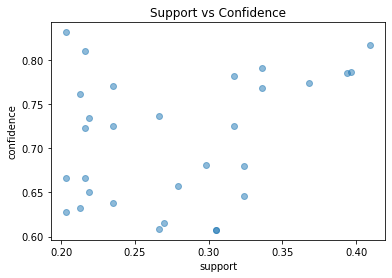

In [22]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

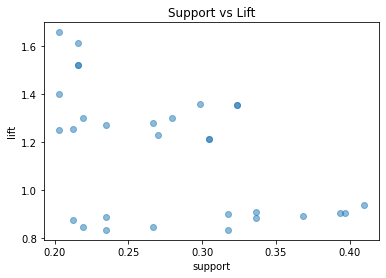

In [28]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

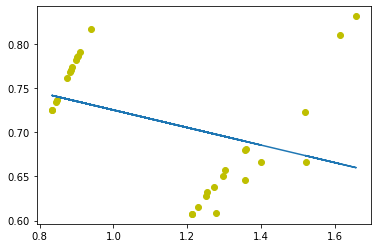

In [29]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))